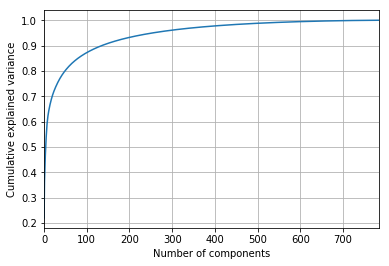

In [1]:
#
"""
Labels
Each training and test example is assigned to one of the following labels:
0 T-shirt/top  1 Trouse  2 Pullover  3 Dress   4 Coat
5 Sandal       6 Shirt   7 Sneaker   8 Bag     9 Ankle boot 

TL;DR
Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

"""
#
import pandas as pd
#
# Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

# split data table into data Features (x) and class labels (y)
x_train = df_training.iloc[:, 1:]
y_train = df_training.iloc[:, :1]

x_train.shape
y_train.shape

# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x_train)

# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)

# Plot to find Number of components
#
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,784,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()


In [2]:
from datetime import datetime

In [3]:
#**********************************************
# Using 50 components
time_strt = datetime.now()
#
sklearn50_pca = PCA(n_components=50)
X_50 = sklearn50_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)
#
X_50.shape

Running time: 
0:00:08.382000


(60000L, 50L)

In [4]:
# Using 100 components
time_strt = datetime.now()
#
sklearn100_pca = PCA(n_components=100)
X_100 = sklearn100_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)
#
X_100.shape


Running time: 
0:00:10.715000


(60000L, 100L)

In [5]:
# Using 300 components
time_strt = datetime.now()
#
sklearn300_pca = PCA(n_components=300)
X_300 = sklearn300_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)
#
X_300.shape


Running time: 
0:00:26.412000


(60000L, 300L)

In [6]:
# Using 600 components
time_strt = datetime.now()
#
sklearn600_pca = PCA(n_components=600)
X_600 = sklearn600_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)
#
X_600.shape


Running time: 
0:01:03.357000


(60000L, 600L)

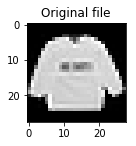

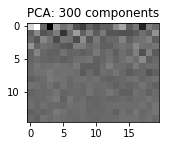

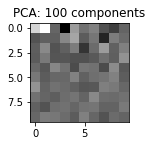

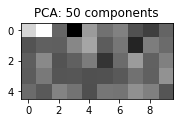

In [7]:
#Plotting 4 images 
Fimg = x_train.iloc[0,:]
Mimg = Fimg.as_matrix()

plt.figure()
plt.subplot(2,2,1)
plt.imshow(Mimg.reshape(28,28), cmap='gray')
plt.title('Original file')

plt.figure()
plt.subplot(2,2,2)
plt.imshow(X_300[0, :].reshape(15,20), cmap='gray')
plt.title('PCA: 300 components')

plt.figure()
plt.subplot(2,2,3)
plt.imshow(X_100[0, :].reshape(10,10), cmap='gray')
plt.title('PCA: 100 components')

plt.figure()
plt.subplot(2,2,4)
plt.imshow(X_50[0, :].reshape(5,10), cmap='gray')
plt.title('PCA: 50 components')

plt.show()
